# Title: Predicting Heart Disease Presence
# Background:
Heart disease is among leading causes of morbidity and mortality worldwide, contributing significantly to healthcare burdens. Early detection and accurate diagnosis are crucial for effective management and prevention strategies. Machine learning techniques offer promising avenues for predicting heart disease based on various clinical and demographic factors.



## Objective:
The objective of this project is to develop a predictive model that can accurately classify whether a patient has heart disease based on relevant medical attributes. By leveraging machine learning algorithms, we aim to assist healthcare professionals in early identification and risk stratification of individuals susceptible to heart disease.

## import packages needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
import os 
import glob

## identify the path in which data is located

In [3]:
path = r'C:\Users\Gilbert\Desktop\hd\heart+disease'
csv_files = glob.glob(os.path.join(path, '*.csv'))
csv_files

['C:\\Users\\Gilbert\\Desktop\\hd\\heart+disease\\EDAHD.csv',
 'C:\\Users\\Gilbert\\Desktop\\hd\\heart+disease\\heart.csv',
 'C:\\Users\\Gilbert\\Desktop\\hd\\heart+disease\\modelHD.csv']

## read the file into the df

In [4]:
df=pd.read_csv("C:\\Users\\Gilbert\\Desktop\\hd\\heart+disease\\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Dataset Description:

| Feature    | Description                                                                                       |
|------------|---------------------------------------------------------------------------------------------------|
| age        | Age in years                                                                                      |
| sex        | Sex (1 = male, 0 = female)                                                                       |
| cp         | Chest pain type                                                                                  |
|            | - 0: typical angina                                                                              |
|            | - 1: atypical angina                                                                             |
|            | - 2: non-anginal pain                                                                            |
|            | - 3: asymptomatic                                                                                |
| trestbps   | Resting blood pressure (in mm Hg on admission to the hospital)                                   |
| chol       | Serum cholesterol in mg/dl                                                                       |
| fbs        | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                            |
| restecg    | Resting electrocardiographic results                                                             |
|            | - 0: normal                                                                                      |
|            | - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) |
|            | - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria    **       **     |
| thalach    | Maximum heart rate achieved                                                                      |
| exang      | Exercise induced angina (1 = yes, 0 = no)                                                        |
| oldpeak    | ST depression induced by exercise relative to rest                                               |
| slope      | The slope of the peak exercise ST segment                                                        |
|            | - 0: upsloping                                                                                    |
|            | - 1: flat                                                                                         |
|            | - 2: downsloping                                                                                  |
| ca         | Number of major vessels (0-3) colored by flourosopy                                              |
| thal       | Thalassemia                                                                                      |
|            | - 0: error (in the original dataset 0 maps to NaN's)                                             |
|            | - 1: fixed defect                                                                                |
|            | - 2: normal                                                                                      |
|            | - 3: reversible defect                                                                           |
| target     | The label (0 = no disease, 1 = disease)ble):
0 = no disease,
1 = disease

## check for missing values

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.shape

(303, 14)

In [11]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
#we want to convert a numerical features that are categorical interms of semantics. I.E sex, cp, fbs, restecg, exang, slope, ca, thal, and target
continous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
features_to_convert = [feature for feature in df.columns if feature not in continous_features]
df[features_to_convert]=df[features_to_convert].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print the columns
print('We have {} numeric features: {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 5 numeric features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We have 9 categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [14]:
#gets the summary statistics of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## insights:
**age**: average age is 54.4% with 77 being the oldest and 29 the youngest

**trestbps**: average resting bp is 131.623mmHg, highest resting  bp is at 200 while lowest resting bp is ar 94

**cholestral**: avarage cholestral level is 246.26mg/dl, with 564mg/dl being the highest while 126mg/dkl being the minimum


**thalach**: average maximum heart rate achieved is 149.64 with a range between 71 and 202

In [15]:
#get the statistical summary of categorical variables
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


## summary:
**sex**: there are two unique values(male:0 and female:1)with "1" occurring 207 times out  of 303 entries

**cp**: has 4 unique values indicating 4 unique chest pain and most common is "0", occuring 147 times

**fbs**: has 2 categories with "0" being most frequent(indicates fasting blood glucose in < 120mg/dl) which appears 258 times.

**restecg**: has 3 inputs with "1" beign most common appearing 152 times

**exang**: has 2 unique values with "0"(indicating no exercise-induced angina) being most common appearing 204 times

**slope**: has 3 unique inputs with 2 being most common appearing 142 times

**ca**: has 5 inputs with "0" being the most common appearing 175 times

**thal**: had 4 inputs with "2" being the most frequent occuring 166 times

**target**: has 2 inputs with "1" being the most frequent, occuring 165 times 

In [16]:
print(df[['sex', 'target']])

    sex target
0     1      1
1     1      1
2     0      1
3     1      1
4     0      1
..   ..    ...
298   0      0
299   1      0
300   1      0
301   1      0
302   0      0

[303 rows x 2 columns]


# EDA

* Exploratory data analysis will be conducted in two phases:
  * *univariate analysis* > to understand how each variable is distributed.
  *  *bivariate analysis* > to understand the relationship between each variable with the target variable.

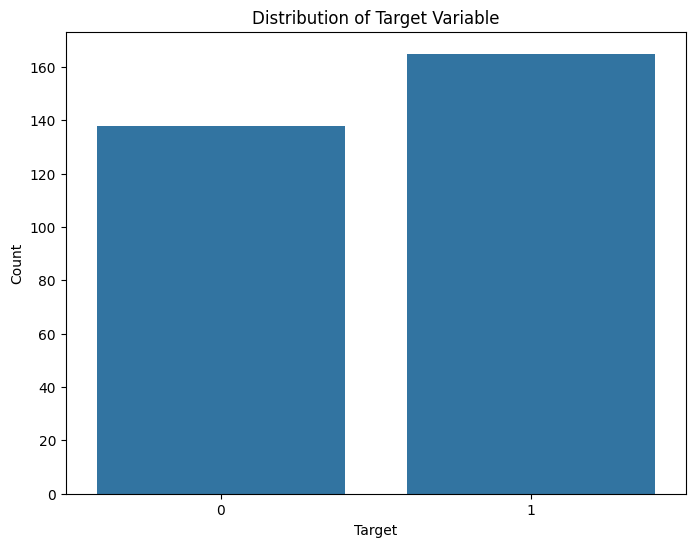

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## Insight:
The count plot indicates that majority of patients have a heart disease

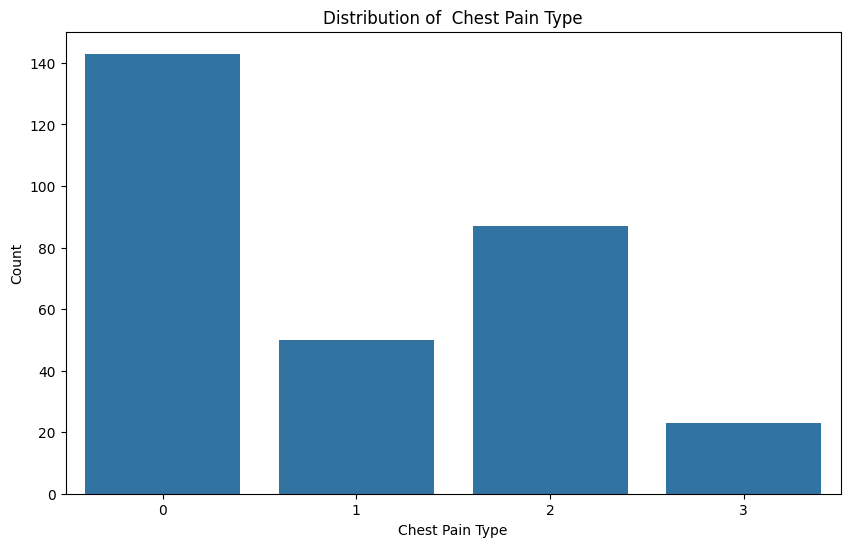

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp')
plt.title('Distribution of  Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### Insight: 
    Patients with chest pain type '0'(typical angina) are the majority.
    Patients with chest pain type '2'(non-anginal pain) are the second highest followed by chest pain type '1'(atypical angina).
    Patients with chest pain type '3'(asymptomtic) are the minority.

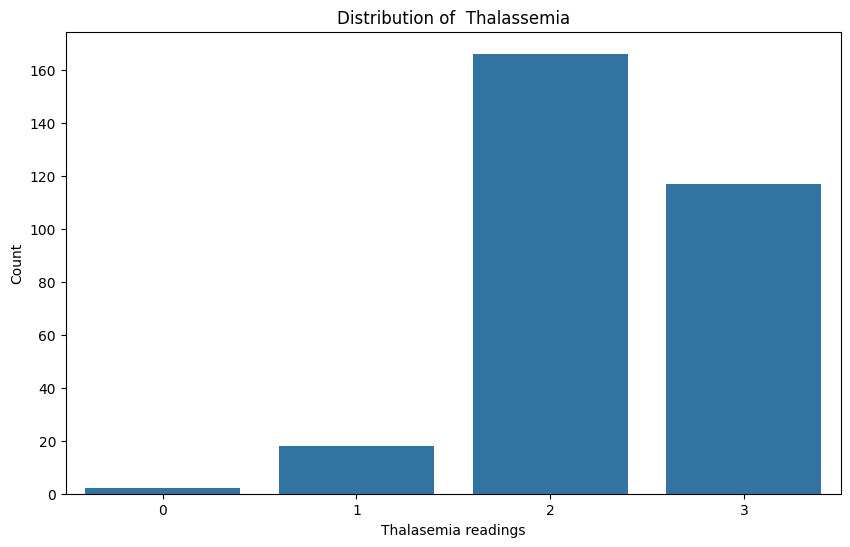

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x= 'thal')
plt.title('Distribution of  Thalassemia')
plt.xlabel('Thalasemia readings')
plt.ylabel('Count')
plt.show()

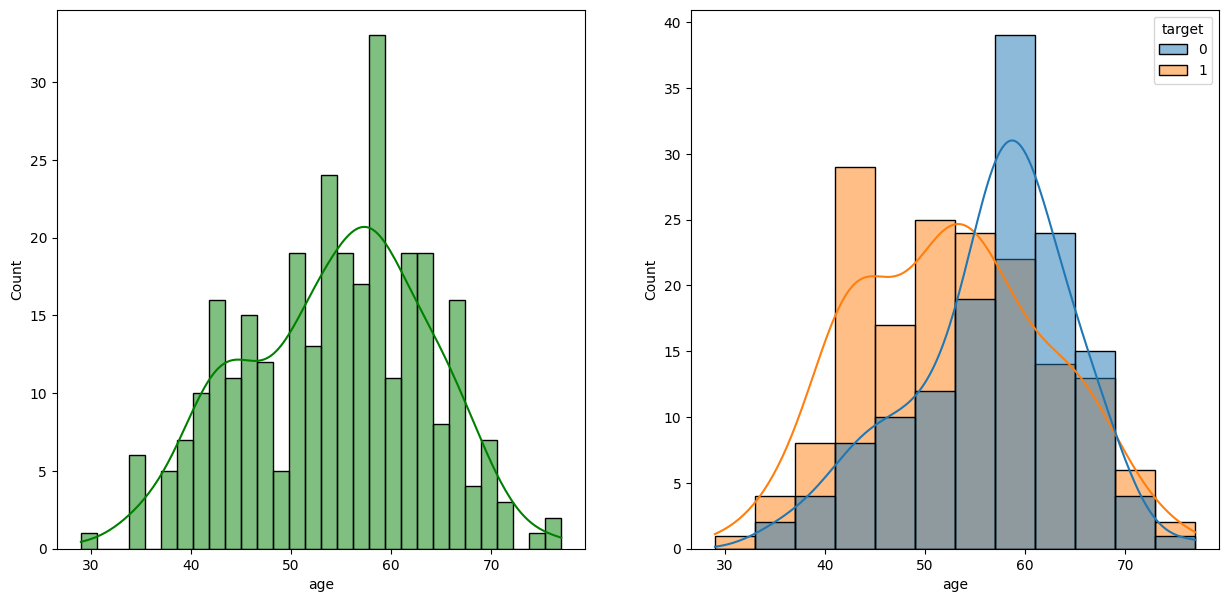

In [20]:
fig, axs = plt.subplots( 1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='age', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='age', kde=True, hue='target')
plt.show()

## insights:
* Individual between 50-60 years have a high probability of having a  heart disease.
* Males represented by "0" aged 60 have diseased hearts.

In [21]:
from scipy.stats import f_oneway

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print the columns
print('We have {} numeric features: {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 5 numeric features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We have 9 categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


#### I performed ANOVA tests to determine if there are significant differences in individuals with and without heart diseases using numerical variables(*comparing the mean of numerical vaariables acoss categories of the target variable*)

In [24]:
f_statistic, p_value = f_oneway(df[df['target'] == 0]['chol'],
                                df[df['target'] == 1]['chol'])

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in serum cholesterol levels based on the presence or absence of heart disease.")
else:
    print("Accept null hypothesis: There is no significant difference in serum cholesterol levels based on the presence or absence of heart disease.")


F-statistic: 2.2029834463803746
P-value: 0.13879032695601218
Accept null hypothesis: There is no significant difference in serum cholesterol levels based on the presence or absence of heart disease.


In [25]:
f_statistic, p_value = f_oneway(df[df['target'] == 0]['age'],
                                df[df['target'] == 1]['age'])

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in age based on the presence or absence of heart disease.")
else:
    print("Accept null hypothesis: There is no significant difference in a based on the presence or absence of heart disease.")


F-statistic: 16.116699823188288
P-value: 7.52480130344234e-05
Reject null hypothesis: There is a significant difference in age based on the presence or absence of heart disease.


In [26]:
f_statistic, p_value = f_oneway(df[df['target'] == 0]['trestbps'],
                                df[df['target'] == 1]['trestbps'])

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in resting blood pressure based on the presence or absence of heart disease.")
else:
    print("Accept null hypothesis: There is no significant difference in resting blood pressure based on the presence or absence of heart disease.")


F-statistic: 6.458168674005333
P-value: 0.011546059200233487
Reject null hypothesis: There is a significant difference in resting blood pressure based on the presence or absence of heart disease.


In [27]:
f_statistic, p_value = f_oneway(df[df['target'] == 0]['thalach'],
                                df[df['target'] == 1]['thalach'])

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in maximum heart rate achieved based on the presence or absence of heart disease.")
else:
    print("Accept null hypothesis: There is no significant difference in maximum heart rate achieved based on the presence or absence of heart disease.")


F-statistic: 65.12010440125097
P-value: 1.6973376386560998e-14
Reject null hypothesis: There is a significant difference in maximum heart rate achieved based on the presence or absence of heart disease.


In [28]:
df.to_csv('EDAHD.csv', index=False)

In [29]:
#I now want to download this "EDAHD" as a csv file
from IPython.display import FileLink

# Generate a link to download the CSV file
FileLink("EDAHD.csv")


c:\Users\Gilbert\Desktop\hd\heart+disease\EDAHD.csv